In [27]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#XG BOOST
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
#모델 평가
from sklearn.metrics import f1_score, roc_curve, auc

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [28]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/HMEQ.csv", engine = "python", encoding="CP949")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [29]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [30]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols : 
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

REASON : 2
JOB : 6


In [31]:
df_raw["JOB"].fillna("Other", inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [32]:
df_raw['JOB'].value_counts()

Other      1525
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [33]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [34]:
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace =False)
df_raw_y = df_raw_dummy["BAD"]

In [35]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [36]:
model = ["DecisionTree", "RandomForest","GradientBoosting"]

train_accuracy = [] ; test_accuracy= []
model_f1_score = []
model_auc = []

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_val_x, df_val_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))



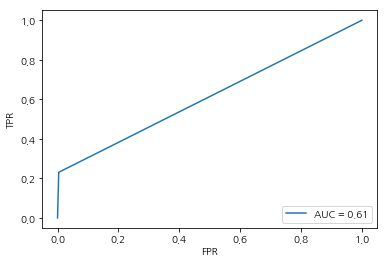

In [39]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [40]:
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=20, n_estimators = 100, random_state= 1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

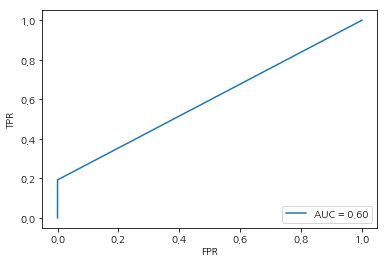

In [41]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [42]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [43]:
gb_model = GradientBoostingClassifier(max_depth=4, min_samples_leaf=10, n_estimators = 100,learning_rate=0.1, random_state= 1234)
gb_model.fit(df_train_x, df_train_y)

train_accuracy.append(gb_model.score(df_train_x, df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

y_pred = gb_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

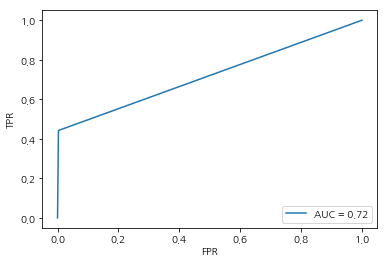

In [44]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [45]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [46]:
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUC"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720


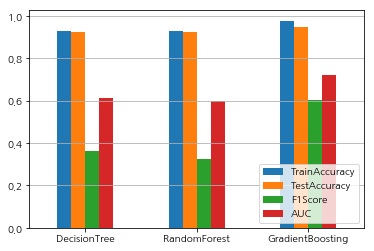

In [49]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis = "y")